#Assignment 6
##create the decision tree classifier and visualize it graphically

#By Eslam Ahmed Abdelrahman

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import andrews_curves
from sklearn.model_selection import train_test_split  
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics , tree #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm


!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
%matplotlib inline



In [4]:
# Reading data from remote link
url = "https://drive.google.com/u/0/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-&export=download"

data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)
data

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = data.drop(['Species','Id'],axis=1)
y = data['Species']


# Data Visualization 



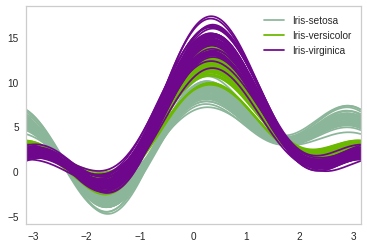

In [6]:
# plot andrews_curves
andrews_curves(data.drop("Id", axis=1), "Species")
plt.show()

In [7]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


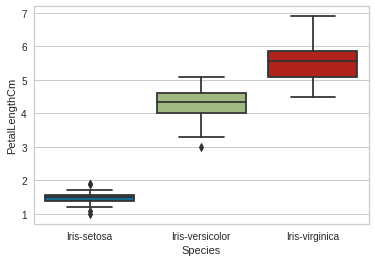

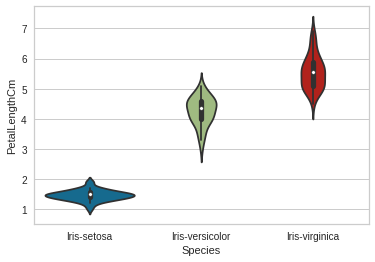

In [8]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

plt.show()
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


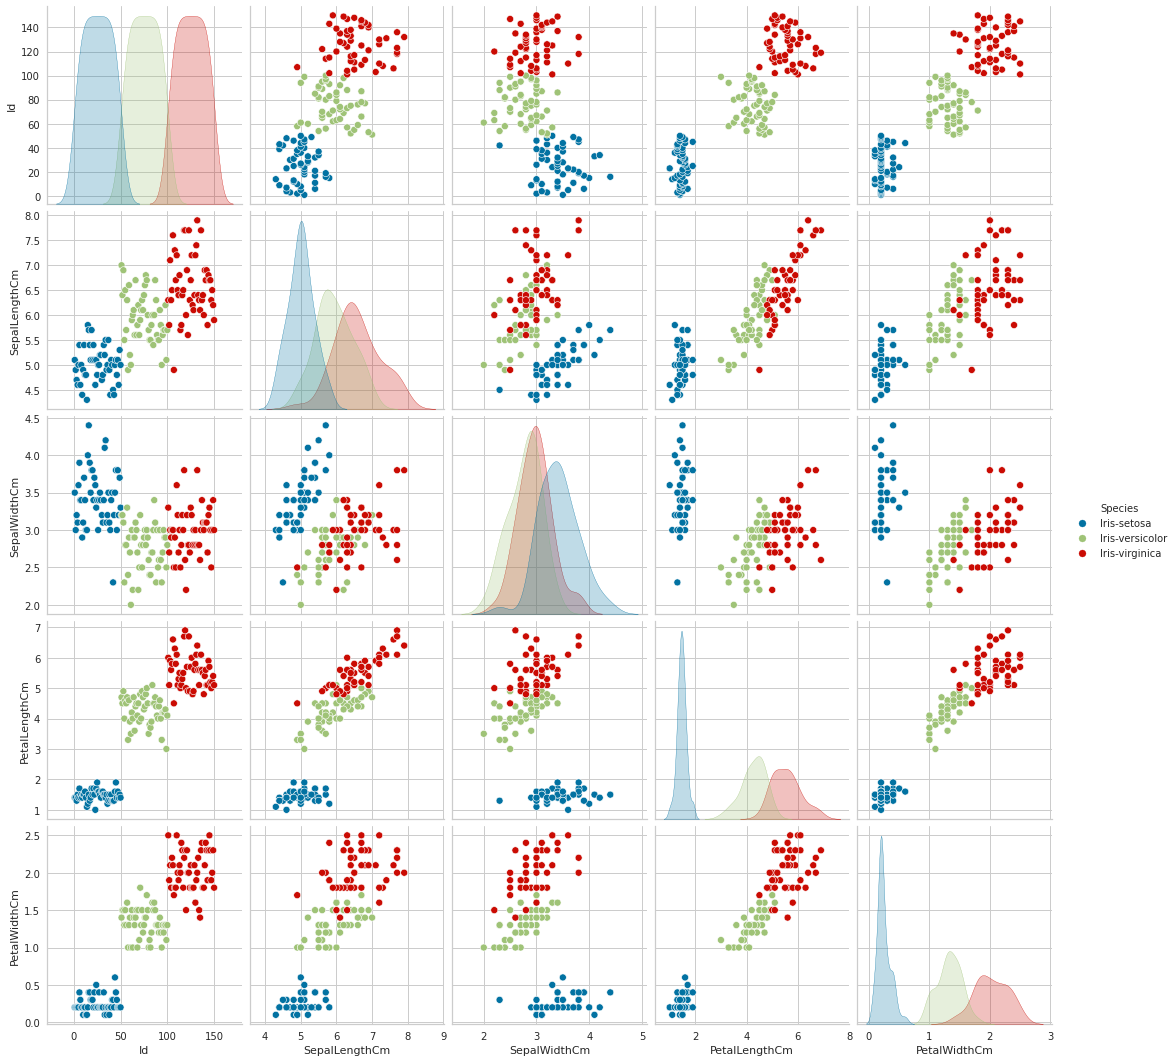

In [9]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Species",size=3);
plt.show()

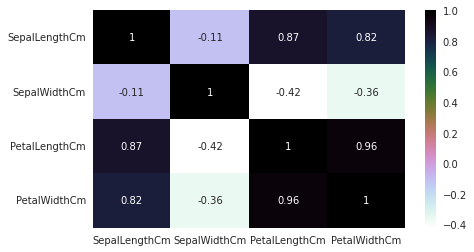

In [10]:
plt.figure(figsize=(7,4)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [11]:
# split data to train and test with 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0,shuffle=True, stratify=y) #
# X_train.shape

In [23]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))
print('The F1 Score of the Decision Tree is',metrics.f1_score(prediction,y_test,average='weighted'   ))


The accuracy of the Decision Tree is 0.9666666666666667
The F1 Score of the Decision Tree is 0.966750208855472


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


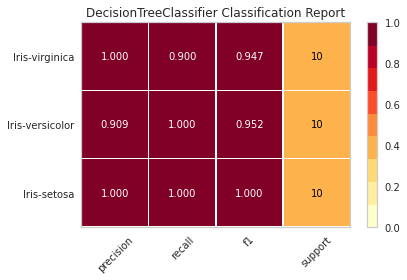

In [16]:
classes = y.unique()
y
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure